In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
train = pd.read_csv('transactions_sber.csv')

In [7]:
train

,client_id,trans_date,small_group,amount_rur
0,33172,6,4,71.463
1,33172,6,35,45.017
2,33172,8,11,13.887
3,33172,9,11,15.983
4,33172,10,11,21.341
...,...,...,...,...
26450572,43300,727,25,7.602
26450573,43300,727,15,3.709
26450574,43300,727,1,6.448
26450575,43300,727,11,24.669


In [8]:
date_agg = train.groupby('trans_date').agg(
    Mean=('amount_rur', np.mean),
    Sum=('amount_rur', np.sum),
    Count_tr = ('amount_rur', len)
    )

In [9]:
date_agg

,Mean,Sum,Count_tr
trans_date,,,
0,51.857967,680065.385,13114
1,70.874438,1539109.293,21716
2,72.347108,1686917.512,23317
3,73.969733,1749975.942,23658
4,70.709500,1700563.477,24050
...,...,...,...
725,65.469588,3237602.066,49452
726,75.548252,3837020.194,50789
727,81.956892,4288804.152,52330


Text(0.5, 1.0, 'Change of mean transaction amount over time in Sber')

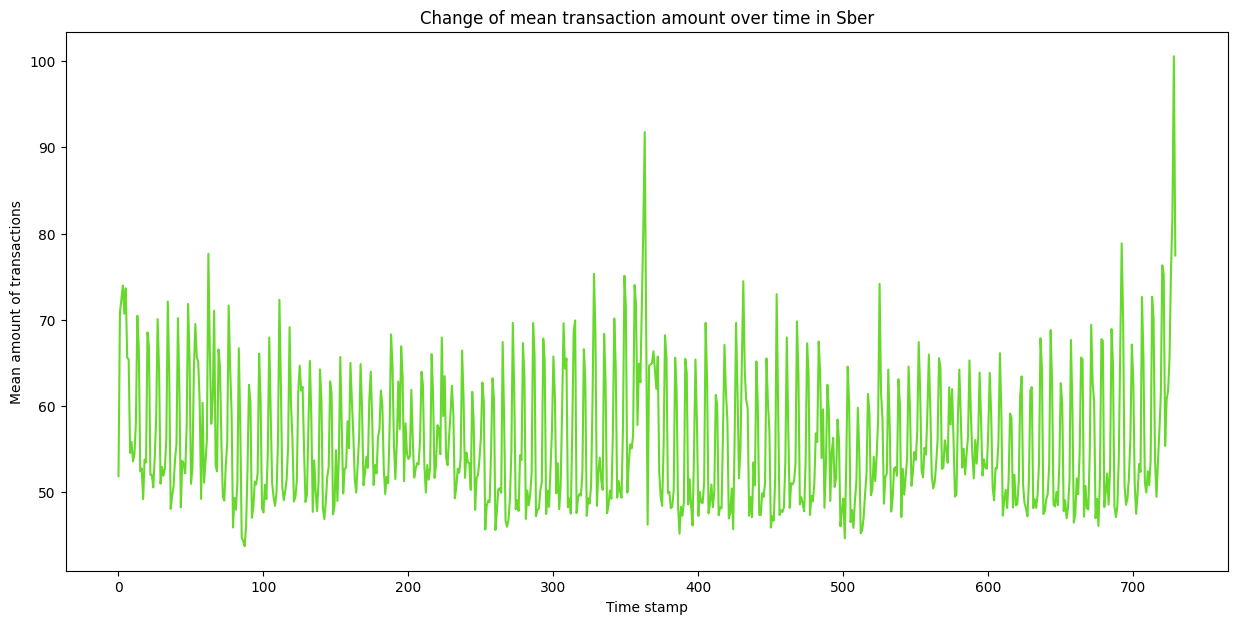

In [49]:
plt.figure(figsize = (15, 7))
plt.plot(date_agg.index, date_agg.Mean, '#66D92C')
plt.xlabel('Time stamp')
plt.ylabel('Mean amount of transactions')
plt.title('Change of mean transaction amount over time in Sber')

Text(0.5, 1.0, 'Change of total transaction amount over time in Sber')

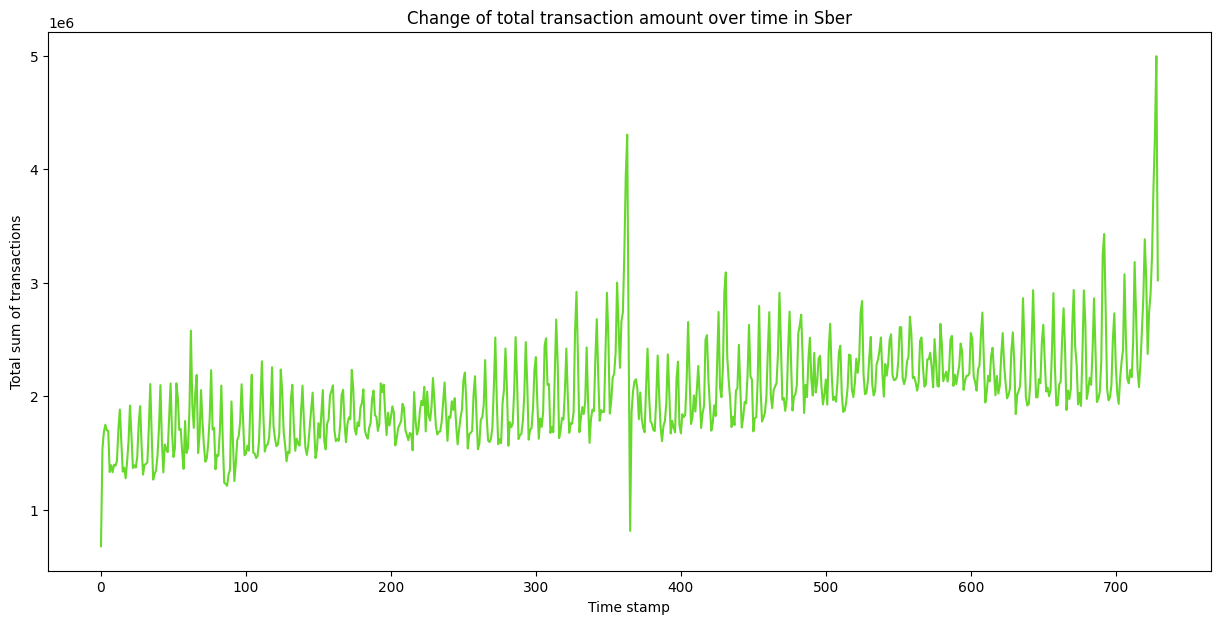

In [48]:
plt.figure(figsize = (15, 7))
plt.plot(date_agg.index, date_agg.Sum, '#66D92C')
plt.xlabel('Time stamp')
plt.ylabel('Total sum of transactions')
plt.title('Change of total transaction amount over time in Sber')

Text(0.5, 1.0, 'Change of total transaction number over time in Sber')

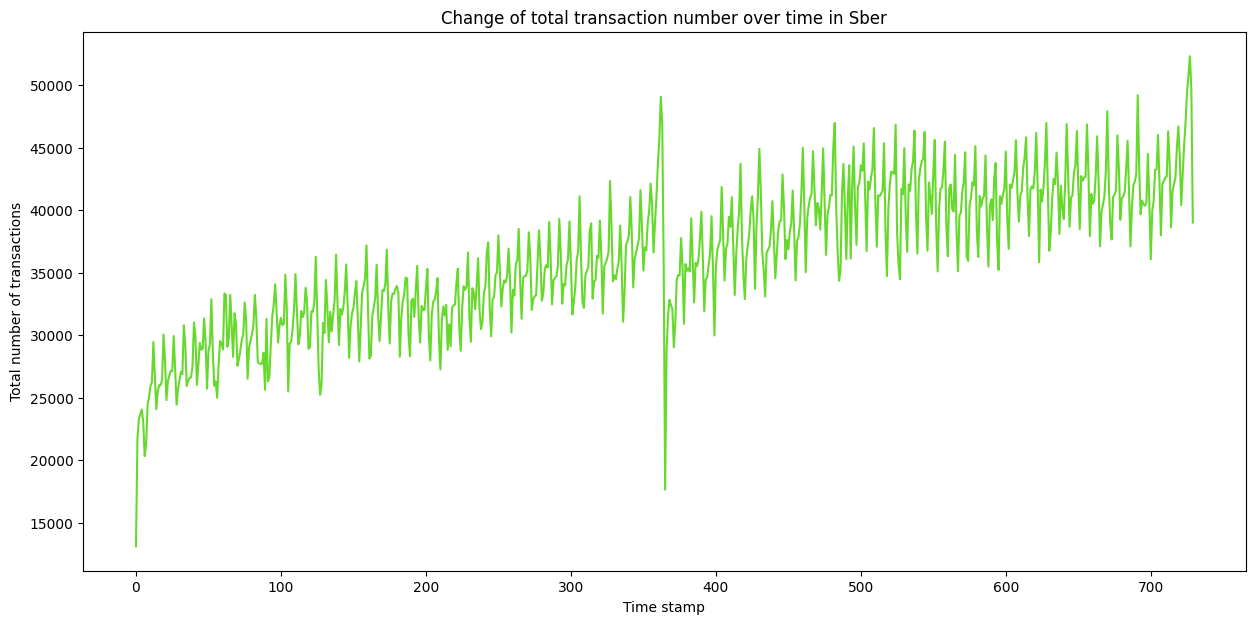

In [47]:
plt.figure(figsize = (15, 7))
plt.plot(date_agg.index, date_agg.Count_tr, '#66D92C')
plt.xlabel('Time stamp')
plt.ylabel('Total number of transactions')
plt.title('Change of total transaction number over time in Sber')

In [31]:
groups_agg = train.groupby('small_group').agg(
    Mean=('amount_rur', np.mean),
    Sum=('amount_rur', np.sum),
    Count_tr = ('amount_rur', len)
    )

In [32]:
groups_agg['percent'] = groups_agg.Count_tr/sum(groups_agg.Count_tr)

Text(0.5, 1.0, "CDF of MCC' transaction number in Sber")

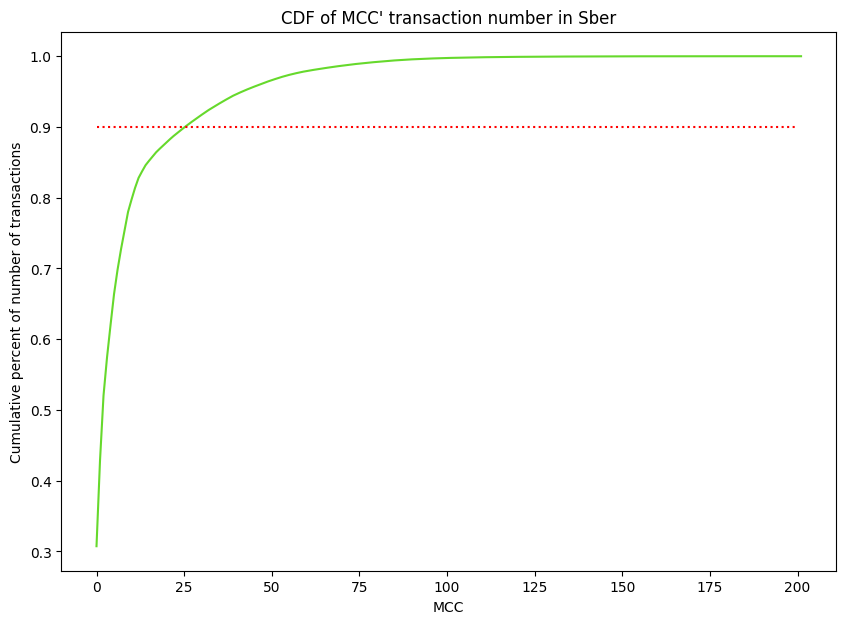

In [54]:
plt.figure(figsize = (10, 7))
groups_agg.sort_values(by='percent', ascending=False, na_position='first').reset_index().percent.cumsum().plot(color = '#66D92C')
plt.xlabel('MCC')
plt.ylabel('Cumulative percent of number of transactions')
plt.hlines(0.9, 0, 200, 'r', linestyles='dotted')
plt.title('CDF of MCC\' transaction number in Sber')

Enough to take 30 most popular mcc codes to cover 90% of all transaction

In [51]:
clients_agg = train.groupby('client_id').agg(
    Mean=('amount_rur', np.mean),
    Sum=('amount_rur', np.sum),
    Count_tr = ('amount_rur', len)
    )

In [52]:
clients_agg.Count_tr.min()

700

Text(0.5, 1.0, 'Distribution of length of sequence of transactions of users in Sber')

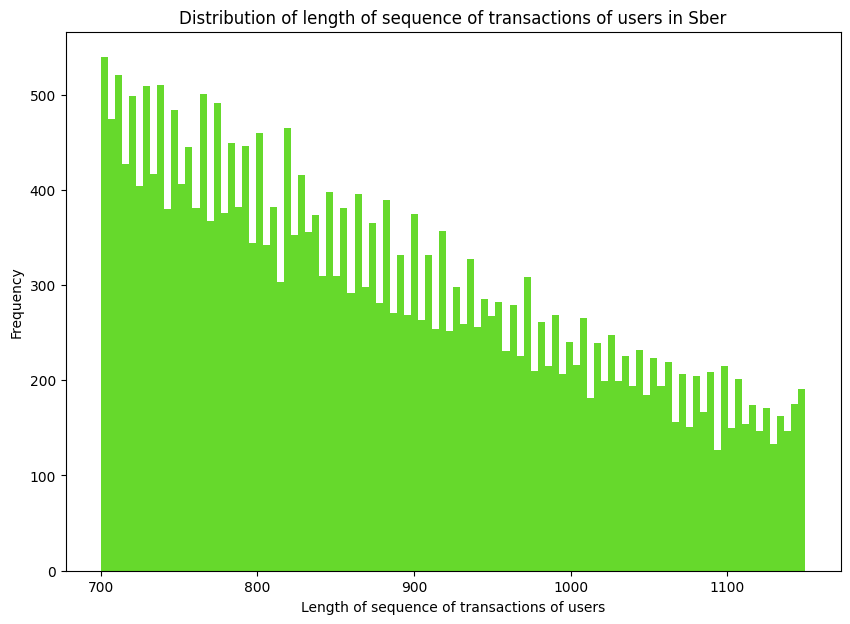

In [53]:
plt.figure(figsize = (10, 7))
plt.hist(clients_agg.Count_tr, bins = 100, color = '#66D92C')
plt.xlabel('Length of sequence of transactions of users')
plt.ylabel('Frequency')
plt.title('Distribution of length of sequence of transactions of users in Sber')

Here everything is good - each client has at least 700 transaction 

In [56]:
clients_agg['percent'] = clients_agg['Sum']/sum(groups_agg['Sum'])

Text(0.5, 1.0, 'Wealth inequality of clients in Sber')

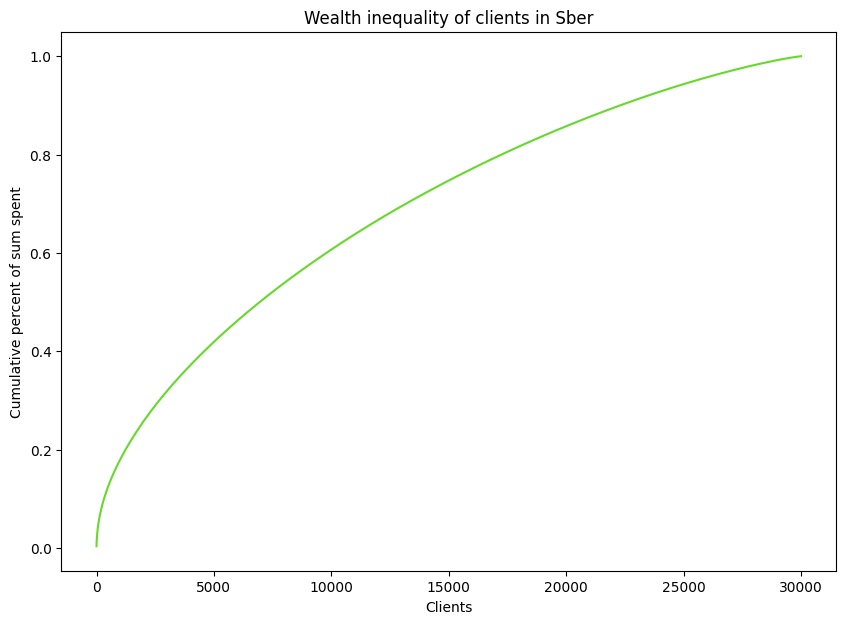

In [57]:
plt.figure(figsize = (10, 7))
clients_agg.sort_values(by='percent', ascending=False, na_position='first').reset_index().percent.cumsum().plot(color = '#66D92C')
plt.xlabel('Clients')
plt.ylabel('Cumulative percent of sum spent')
plt.title("Wealth inequality of clients in Sber")